In [1]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df=pd.read_csv("总表.csv")

In [4]:
df = df.drop('year', 1)
df = df.drop('month', 1)

In [5]:
perdict_name = '上证收盘'
for i in range(4):
  # df = df.drop('X11上证收盘'+str(i+1), 1)
  df = df.drop('X11沪深300收盘'+str(i+1), 1)
df = df.drop('Y沪深300收盘', 1)

In [6]:
df.head(2)

,X1居民消费价格指数1,X1居民消费价格指数2,X1居民消费价格指数3,X1居民消费价格指数4,X2企业景气指数1,X2企业景气指数2,X2企业景气指数3,X2企业景气指数4,X3工业增加值1,X3工业增加值2,X3工业增加值3,X3工业增加值4,X4货币供应量1,X4货币供应量2,X4货币供应量3,X4货币供应量4,X5银行间拆借利率1,X5银行间拆借利率2,X5银行间拆借利率3,X5银行间拆借利率4,X6人民币对美元的汇率（收盘）1,X6人民币对美元的汇率（收盘）2,X6人民币对美元的汇率（收盘）3,X6人民币对美元的汇率（收盘）4,X7进出口总额1,X7进出口总额2,X7进出口总额3,X7进出口总额4,X8国家财政支出1,X8国家财政支出2,X8国家财政支出3,X8国家财政支出4,X9股市成交量（上海）1,X9股市成交量（上海）2,X9股市成交量（上海）3,X9股市成交量（上海）4,X10城镇固定资产投资额1,X10城镇固定资产投资额2,X10城镇固定资产投资额3,X10城镇固定资产投资额4,X11上证收盘1,X11上证收盘2,X11上证收盘3,X11上证收盘4,Y上证收盘
0,102.0,103.2,102.1,102.4000,125.6,125.6,125.6,120.6,9400,9900,8900,9300,992129.25,998600.83,1035858.37,1032551.90,183.0775,182.0775,181.0775,180.0775,6.2188,6.2214,6.2108,6.1650,345584884,263509010,365203096.0,355961467.0,13655.86,8770.28,9607.75,11430.81,2682.0,1831.0,2334.0,1501.0,57953.0,54119.0,57523.0,60567.0,2177.76,2122.38,1967.66,1942.89,2177.76
1,103.2,102.1,102.4,102.0981,125.6,125.6,120.6,120.6,9900,8900,9300,9200,998600.83,1035858.37,1032551.90,1042169.16,182.0775,181.0775,180.0775,179.0775,6.2214,6.2108,6.1650,6.1348,263509010,365203096,355961467.0,345107274.0,8770.28,9607.75,11430.81,12749.00,1831.0,2334.0,1501.0,2305.0,54119.0,57523.0,60567.0,54645.0,2122.38,1967.66,1942.89,2037.69,2122.38


In [7]:
df.isnull().sum().sum()

0

In [8]:
summary=df.describe()

In [9]:
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
X1居民消费价格指数1,57.0,1.019315e+02,5.763629e-01,1.008000e+02,1.015000e+02,1.019000e+02,1.023000e+02,1.032000e+02
X1居民消费价格指数2,57.0,1.019297e+02,5.763029e-01,1.008000e+02,1.015000e+02,1.019000e+02,1.023000e+02,1.032000e+02
X1居民消费价格指数3,57.0,1.019034e+02,5.509526e-01,1.008000e+02,1.015000e+02,1.019000e+02,1.023000e+02,1.032000e+02
X1居民消费价格指数4,57.0,1.018982e+02,5.504739e-01,1.008000e+02,1.015000e+02,1.018014e+02,1.023000e+02,1.032000e+02
X2企业景气指数1,57.0,1.187000e+02,5.728874e+00,1.071000e+02,1.135000e+02,1.206000e+02,1.234000e+02,1.256000e+02
X2企业景气指数2,57.0,1.186614e+02,5.688828e+00,1.071000e+02,1.135000e+02,1.206000e+02,1.234000e+02,1.256000e+02
X2企业景气指数3,57.0,1.186228e+02,5.648230e+00,1.071000e+02,1.135000e+02,1.206000e+02,1.234000e+02,1.256000e+02
X2企业景气指数4,57.0,1.185842e+02,5.607068e+00,1.071000e+02,1.135000e+02,1.206000e+02,1.234000e+02,1.252000e+02
X3工业增加值1,57.0,7.445614e+03,1.506186e+03,5.600000e+03,6.100000e+03,6.800000e+03,8.900000e+03,1.040000e+04
X3工业增加值2,57.0,7.389474e+03,1.491606e+03,5.600000e+03,6.100000e+03,6.800000e+03,8.800000e+03,1.040000e+04


In [10]:
df.describe().round()

,X1居民消费价格指数1,X1居民消费价格指数2,X1居民消费价格指数3,X1居民消费价格指数4,X2企业景气指数1,X2企业景气指数2,X2企业景气指数3,X2企业景气指数4,X3工业增加值1,X3工业增加值2,X3工业增加值3,X3工业增加值4,X4货币供应量1,X4货币供应量2,X4货币供应量3,X4货币供应量4,X5银行间拆借利率1,X5银行间拆借利率2,X5银行间拆借利率3,X5银行间拆借利率4,X6人民币对美元的汇率（收盘）1,X6人民币对美元的汇率（收盘）2,X6人民币对美元的汇率（收盘）3,X6人民币对美元的汇率（收盘）4,X7进出口总额1,X7进出口总额2,X7进出口总额3,X7进出口总额4,X8国家财政支出1,X8国家财政支出2,X8国家财政支出3,X8国家财政支出4,X9股市成交量（上海）1,X9股市成交量（上海）2,X9股市成交量（上海）3,X9股市成交量（上海）4,X10城镇固定资产投资额1,X10城镇固定资产投资额2,X10城镇固定资产投资额3,X10城镇固定资产投资额4,X11上证收盘1,X11上证收盘2,X11上证收盘3,X11上证收盘4,Y上证收盘
count,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0
mean,102.0,102.0,102.0,102.0,119.0,119.0,119.0,119.0,7446.0,7389.0,7323.0,7275.0,1316212.0,1327814.0,1339593.0,1350837.0,151.0,149.0,147.0,145.0,6.0,6.0,6.0,6.0,335704390.0,335602452.0,337901416.0,338668170.0,12551.0,12596.0,12642.0,12663.0,4383.0,4384.0,4422.0,4433.0,49659.0,49684.0,49739.0,49723.0,2490.0,2506.0,2523.0,2542.0,2490.0
std,1.0,1.0,1.0,1.0,6.0,6.0,6.0,6.0,1506.0,1492.0,1462.0,1454.0,201212.0,201257.0,201293.0,201923.0,25.0,27.0,29.0,30.0,0.0,0.0,0.0,0.0,37401471.0,37381974.0,36895402.0,37913013.0,2655.0,2696.0,2652.0,2632.0,2972.0,2971.0,2952.0,2945.0,9051.0,9076.0,9113.0,9100.0,544.0,548.0,551.0,551.0,544.0
min,101.0,101.0,101.0,101.0,107.0,107.0,107.0,107.0,5600.0,5600.0,5600.0,5600.0,992129.0,998601.0,1032552.0,1032552.0,67.0,67.0,57.0,57.0,6.0,6.0,6.0,6.0,219697006.0,219697006.0,219697006.0,219697006.0,8588.0,8588.0,8588.0,8588.0,1501.0,1501.0,1501.0,1501.0,32416.0,32416.0,32416.0,32416.0,1747.0,1747.0,1747.0,1747.0,1747.0
25%,102.0,102.0,102.0,102.0,114.0,114.0,114.0,114.0,6100.0,6100.0,6100.0,6100.0,1160687.0,1168813.0,1182294.0,1194249.0,141.0,140.0,139.0,138.0,6.0,6.0,6.0,6.0,318527152.0,318527152.0,321247714.0,321247714.0,10218.0,10218.0,10652.0,10691.0,2383.0,2383.0,2495.0,2717.0,43034.0,43034.0,43034.0,43034.0,1940.0,1940.0,1940.0,1940.0,1940.0
50%,102.0,102.0,102.0,102.0,121.0,121.0,121.0,121.0,6800.0,6800.0,6600.0,6500.0,1307358.0,1333375.0,1353211.0,1356908.0,155.0,154.0,153.0,152.0,6.0,6.0,6.0,6.0,340484185.0,340477446.0,340484185.0,340484185.0,12282.0,12282.0,12282.0,12282.0,3423.0,3423.0,3636.0,3636.0,50107.0,50107.0,50107.0,50107.0,2628.0,2633.0,2654.0,2658.0,2628.0
75%,102.0,102.0,102.0,102.0,123.0,123.0,123.0,123.0,8900.0,8800.0,8800.0,8700.0,1491559.0,1510983.0,1516360.0,1519485.0,169.0,168.0,167.0,166.0,7.0,7.0,7.0,7.0,356765596.0,356765596.0,358628525.0,358628525.0,14435.0,14770.0,14770.0,14770.0,5110.0,5110.0,5110.0,5110.0,54645.0,54645.0,55079.0,55079.0,2868.0,2885.0,2921.0,2957.0,2868.0
max,103.0,103.0,103.0,103.0,126.0,126.0,126.0,125.0,10400.0,10400.0,10400.0,10400.0,1655662.0,1655662.0,1670013.0,1676769.0,183.0,182.0,181.0,180.0,7.0,7.0,7.0,7.0,405413212.0,405413212.0,405413212.0,408908054.0,20208.0,20208.0,20208.0,20208.0,13203.0,13203.0,13203.0,13203.0,76887.0,76887.0,76887.0,76887.0,3684.0,3684.0,3684.0,3684.0,3684.0


In [11]:
#To Scale data from 0 to 1 apply preprocessing Mms!
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler(feature_range=(100,1000000))
scale_df=mc.fit_transform(df)

In [12]:
df_sc=pd.DataFrame(scale_df)

In [13]:
df_sc.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,500050.0,1000000.0,541712.5,666700.0000,1000000.0,1000000.0,1000000.000000,745881.767956,791687.50,895843.75,687531.25,770856.25,100.000000,100.000000,5286.414165,100.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,185042.222222,187960.000000,176064.444444,124666.666667,677883.010559,235984.760642,783507.880899,720199.782725,436176.915351,15770.644229,87835.299782,244710.400923,101012.826867,28297.487609,71277.29448,100.000000,574278.543757,488072.984275,564610.210273,633053.017541,222360.812583,193766.276968,113879.195885,101089.621180,222360.812583
1,1000000.0,541712.5,666700.0,540920.9125,1000000.0,1000000.0,729756.756757,745881.767956,895843.75,687531.25,770856.25,750025.00,9852.242311,56797.628742,100.000000,15027.118731,9.913544e+05,991278.955673,991914.511669,991848.597003,187960.000000,176064.444444,124666.666667,90775.555556,235984.760642,783507.880899,733750.753957,662839.984259,15770.644229,87835.299782,244710.400923,358141.220300,28297.487609,71277.294480,100.00000,68799.333447,488072.984275,564610.210273,633053.017541,499899.829421,193766.276968,113879.195885,101089.621180,150038.013674,193766.276968


In [14]:
df_sc.describe().round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
count,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0
mean,471507.0,470776.0,459812.0,457620.0,627064.0,624978.0,622892.0,634523.0,384564.0,372870.0,358982.0,349115.0,488471.0,501088.0,481714.0,494116.0,722436.0,711913.0,723310.0,715621.0,376519.0,384711.0,392417.0,398243.0,624686.0,624137.0,636515.0,628812.0,341080.0,344972.0,348919.0,350748.0,246375.0,246428.0,249674.0,250614.0,387802.0,388349.0,389580.0,389226.0,383337.0,391815.0,400523.0,410509.0,383337.0
std,240127.0,240102.0,229541.0,229341.0,309638.0,307473.0,305279.0,309752.0,313757.0,310720.0,304557.0,302829.0,303214.0,306269.0,315742.0,313409.0,220166.0,236357.0,237126.0,244854.0,308697.0,309719.0,310201.0,309181.0,201370.0,201265.0,198646.0,200354.0,228485.0,231996.0,228177.0,226459.0,253927.0,253897.0,252236.0,251658.0,203517.0,204068.0,204890.0,204600.0,280832.0,283171.0,284599.0,284348.0,280832.0
min,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
25%,291738.0,291738.0,291738.0,291738.0,346011.0,346011.0,346011.0,353656.0,104256.0,104256.0,104256.0,104256.0,254106.0,259124.0,234980.0,251073.0,636883.0,633716.0,660409.0,657641.0,124667.0,124667.0,124667.0,124667.0,532204.0,532204.0,546851.0,536752.0,140391.0,140391.0,177736.0,181017.0,75464.0,75464.0,85034.0,103985.0,238829.0,238829.0,238829.0,238829.0,99386.0,99386.0,99386.0,99386.0,99386.0
50%,458388.0,458388.0,458388.0,417301.0,729757.0,729757.0,729757.0,745882.0,250075.0,250075.0,208412.0,187581.0,475128.0,509552.0,503075.0,503539.0,757922.0,755811.0,773606.0,771761.0,220056.0,230492.0,242051.0,296479.0,650421.0,650384.0,650421.0,638409.0,317960.0,317960.0,317960.0,317960.0,164299.0,164299.0,182529.0,182529.0,397864.0,397864.0,397864.0,397864.0,455083.0,457205.0,468518.0,470335.0,455083.0
75%,625038.0,625038.0,625038.0,625038.0,881093.0,881093.0,881093.0,900562.0,687531.0,666700.0,666700.0,645869.0,752707.0,779831.0,758985.0,755878.0,878961.0,877905.0,886803.0,885880.0,654692.0,654692.0,654692.0,654692.0,738080.0,738080.0,748110.0,734294.0,503229.0,532066.0,532066.0,532066.0,308478.0,308478.0,308478.0,308478.0,499900.0,499900.0,509658.0,509658.0,578915.0,587315.0,606058.0,624646.0,578915.0
max,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0


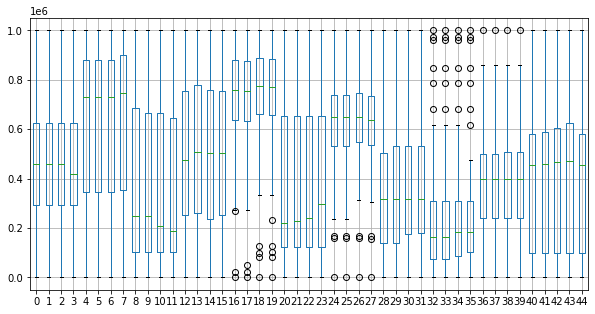

In [15]:
df_sc.boxplot(figsize=(10,5))
plt.show()

In [16]:
df_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,500050.0000,1000000.0000,541712.5000,666700.0000,1000000.000000,1000000.000000,1000000.000000,745881.767956,791687.50,895843.75,687531.25,770856.25,100.000000,100.000000,5286.414165,100.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,185042.222222,187960.000000,176064.444444,124666.666667,677883.010559,235984.760642,783507.880899,720199.782725,436176.915351,15770.644229,87835.299782,244710.400923,101012.826867,28297.487609,71277.294480,100.000000,574278.543757,488072.984275,564610.210273,633053.017541,222360.812583,193766.276968,113879.195885,101089.621180,222360.812583
1,1000000.0000,541712.5000,666700.0000,540920.9125,1000000.000000,1000000.000000,729756.756757,745881.767956,895843.75,687531.25,770856.25,750025.00,9852.242311,56797.628742,100.000000,15027.118731,9.913544e+05,991278.955673,991914.511669,991848.597003,187960.000000,176064.444444,124666.666667,90775.555556,235984.760642,783507.880899,733750.753957,662839.984259,15770.644229,87835.299782,244710.400923,358141.220300,28297.487609,71277.294480,100.000000,68799.333447,488072.984275,564610.210273,633053.017541,499899.829421,193766.276968,113879.195885,101089.621180,150038.013674,193766.276968
2,541712.5000,666700.0000,540920.9125,791687.5000,1000000.000000,729756.756757,729756.756757,745881.767956,687531.25,770856.25,750025.00,687531.25,65996.886740,51765.922179,15185.300483,34016.548354,9.827087e+05,982557.911345,983829.023337,983697.194006,176064.444444,124666.666667,90775.555556,93917.777778,783507.880899,733750.753957,675311.548168,538123.551256,87835.299782,244710.400923,358141.220300,326127.877965,71277.294480,100.000000,68799.333447,4714.134336,564610.210273,633053.017541,499899.829421,470422.654543,113879.195885,101089.621180,150038.013674,15109.807698,113879.195885
3,666700.0000,540920.9125,791687.5000,791687.5000,729756.756757,729756.756757,729756.756757,795600.552486,770856.25,750025.00,687531.25,854181.25,61014.255507,66401.237259,34375.959914,30615.315401,9.740631e+05,973836.867018,975743.535006,975545.791010,124666.666667,90775.555556,93917.777778,84154.444444,733750.753957,675311.548168,548248.178204,710704.542671,244710.400923,358141.220300,326127.877965,280662.271546,100.000000,68799.333447,4714.134336,57263.997607,633053.017541,499899.829421,470422.654543,860641.090853,101089.621180,150038.013674,15109.807698,100.000000,101089.621180
4,540920.9125,791687.5000,791687.5000,750025.0000,729756.756757,729756.756757,778400.540541,795600.552486,750025.00,687531.25,854181.25,1000000.00,75506.829174,85019.450908,30938.684306,44652.806874,9.654174e+05,965115.822690,967658.046674,967394.388013,90775.555556,93917.777778,84154.444444,73605.555556,675311.548168,548248.178204,724076.830715,702953.032737,358141.220300,326127.877965,280662.271546,100.000000,68799.333447,4714.134336,57263.997607,85034.250555,499899.829421,470422.654543,860641.090853,509658.100891,150038.013674,15109.807698,100.000000,43993.489936,150038.013674


In [17]:
x=df_sc.drop(44,axis=1)
x.shape

(57, 44)

In [18]:
y=df_sc[44]
y.shape

(57,)

In [19]:
from sklearn.model_selection import train_test_split
orig_X_train,orig_X_test,y_train,y_test=train_test_split(x,y,test_size=12,shuffle=False)
from sklearn.decomposition import PCA
trans_x = None
for item in np.hsplit(x.to_numpy(),11):
  pca = PCA(n_components=2)
  pca.fit(item)
  item = pca.transform(item)
  if type(trans_x)==type(None):
    trans_x=item
  else:
    trans_x=np.concatenate((trans_x,item), axis=1)


X_train,X_test,y_train,y_test=train_test_split(trans_x,y,test_size=12,shuffle=False)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((45, 22), (12, 22), (45,), (12,))

In [20]:
trans_x

array([[ 435948.45294077,  -63743.22240746, -620715.70865256, ...,
          62099.32784867, -478264.38877468,  118560.89146971],
       [ 439297.25077787,  283530.56488724, -483591.08394706, ...,
          31153.13605195, -515434.37722765,   49116.77795617],
       [ 335088.68064232, -162152.39711845, -345429.04023643, ...,
        -111774.6152501 , -601710.1412872 ,   66246.68518406],
       ...,
       [-201013.3752315 , -137243.86688318, -525193.96518783, ...,
          98306.94365314,  572767.49076901,  -11442.10312826],
       [-139037.48606379,   -2403.31031102, -522451.47269372, ...,
         -43171.33860384,  595218.21009068,   22929.06252718],
       [-136117.18977559,  -54066.69869897, -519688.23181951, ...,
        -122996.32565938,  587328.12781883,   27153.72929479]])

In [21]:
#import keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Lambda, Subtract
from tensorflow.keras import metrics

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
dense_input (InputLayer)        [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_3_input (InputLayer)      [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_6_input (InputLayer)      [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_9_input (InputLayer)      [(None, 2)]          0                                            
______________________________________________________________________________________________

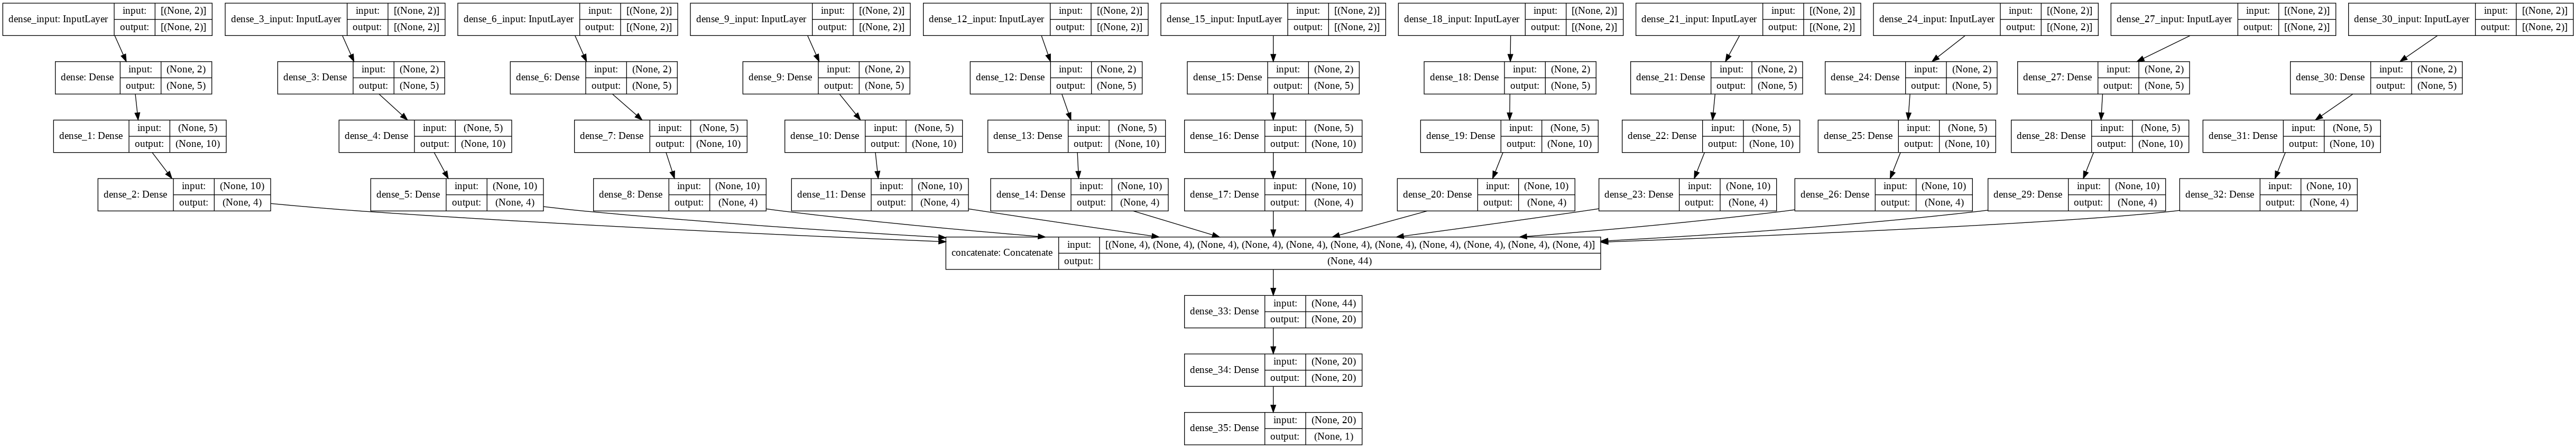

In [22]:
from tensorflow.keras.utils import plot_model
# def SVD(X):
#     meanX = tf.reduce_mean(X, axis=0, keepdims=True)
#     standardized =tf.math.subtract(X, meanX)
#     sigma2 = tf.transpose(standardized) @ standardized
#     s ,u ,v = tf.linalg.svd(sigma2,compute_uv=True)
#     epsilon = 1e-6
#     # sqrt of number close to 0 leads to problem hence replace it with epsilon
#     si = tf.where(tf.less(s, epsilon), 
#                   tf.dtypes.cast(tf.sqrt(1 / epsilon), tf.float64) * tf.dtypes.cast(tf.ones_like(s), tf.float64), 
#                   tf.math.truediv(tf.dtypes.cast(1.0, tf.float64), tf.dtypes.cast(tf.sqrt(s), tf.float64)))
#     return tf.dtypes.cast(standardized, tf.float64) @ tf.dtypes.cast(u, tf.float64) @ tf.dtypes.cast(tf.linalg.diag(si), tf.float64) @ tf.dtypes.cast(tf.transpose(v), tf.float64) 
nn1s = []
for i in range(11):
  nn1=Sequential()
  nn1.add(Dense(5,input_dim=2,activation='relu'))
  nn1.add(Dense(10,activation='relu'))
  nn1.add(Dense(4,activation='linear'))
  nn1s.append(nn1)
  nn1.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])

concatted = keras.layers.Concatenate()(list(map(lambda x: x.output, nn1s)))

# svg = Lambda(SVD)(concatted)

nn2 = Dense(20, activation='relu')(concatted)
nn2 = Dense(20,activation='relu')(nn2)
nn2 = Dense(1,activation='linear')(nn2)
model = Model(inputs = list(map(lambda x: x.input, nn1s)), outputs = nn2)
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
splited_X_train = np.hsplit(X_train, 11)

In [24]:
model.fit(splited_X_train,y_train,epochs=9000,verbose=1)

Streaming output truncated to the last 5000 lines.
Epoch 6501/9000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 6502/9000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 6503/9000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 6504/9000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 6505/9000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 6506/9000
2/2 [==============================] - 0s 10ms/step - loss: 0.0103 - accuracy: 0.0000e+00
Epoch 6507/9000
2/2 [==============================] - 0s 14ms/step - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 6508/9000
2/2 [==============================] - 0s 11ms/step - loss: 0.0215 - accuracy: 0.0000e+00
Epoch 6509/9000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - accuracy: 0.0000e+

In [25]:
#Testing the test dataset
splited_X_test = np.hsplit(X_test, 11)
y_pred=model.predict(splited_X_test)
y_pred

array([[454894.12],
       [555218.44],
       [506233.4 ],
       [403606.7 ],
       [447495.28],
       [395572.34],
       [418142.25],
       [473722.47],
       [512748.16],
       [669455.4 ],
       [812793.8 ],
       [822125.3 ]], dtype=float32)

Text(0.5, 1.0, 'SARIMA + NN Model')

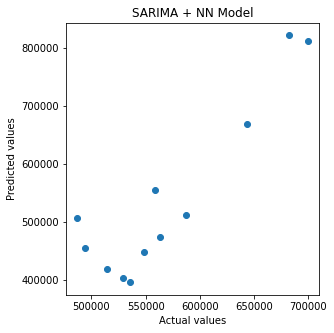

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SARIMA + NN Model")

In [27]:
ori_X_test = mc.inverse_transform(orig_X_test.join(y_test))
ori_X_pred = mc.inverse_transform(pd.concat([orig_X_test,pd.DataFrame(y_pred,orig_X_test.index,None)],axis=1))
print('origin test data is \n',pd.DataFrame(ori_X_test,orig_X_test.index,None))
print('predicted data is \n',pd.DataFrame(ori_X_pred,orig_X_test.index,None))
pd.DataFrame(ori_X_pred,orig_X_test.index,None).to_csv(perdict_name+".csv")

origin test data is 
        0      1      2      3   ...       41       42       43       44
45  102.1  102.3  102.1  102.5  ...  2829.06  2690.55  2771.26  2704.53
46  102.3  102.1  102.5  100.8  ...  2690.55  2771.26  2810.22  2829.06
47  102.1  102.5  100.8  100.9  ...  2771.26  2810.22  2785.25  2690.55
48  102.5  100.8  100.9  101.2  ...  2810.22  2785.25  2743.75  2771.26
49  100.8  100.9  101.2  101.5  ...  2785.25  2743.75  2838.24  2810.22
50  100.9  101.2  101.5  101.5  ...  2743.75  2838.24  2884.58  2785.25
51  101.2  101.5  101.5  101.4  ...  2838.24  2884.58  2994.17  2743.75
52  101.5  101.5  101.4  101.8  ...  2884.58  2994.17  3102.14  2838.24
53  101.5  101.4  101.8  101.6  ...  2994.17  3102.14  3067.78  2884.58
54  101.4  101.8  101.6  101.9  ...  3102.14  3067.78  3113.69  2994.17
55  101.8  101.6  101.9  101.7  ...  3067.78  3113.69  3083.65  3102.14
56  101.6  101.9  101.7  101.8  ...  3113.69  3083.65  3070.03  3067.78

[12 rows x 45 columns]
predicted data is 

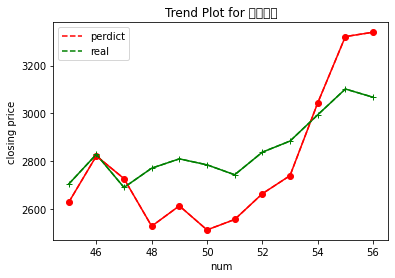

In [28]:
x1=x2=orig_X_test.index
y1=ori_X_pred[:,44]
y2=ori_X_test[:,44]
plt.plot(x1,y1,'ro-',x2,y2,'g+-')
plt.title('Trend Plot for '+perdict_name)
l1=plt.plot(x1,y1,'r--',label='perdict')
l2=plt.plot(x2,y2,'g--',label='real')
plt.xlabel('num')
plt.ylabel('closing price')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
print('MAE:',mean_absolute_error(ori_X_test[:,44],ori_X_pred[:,44]))
mse = mean_squared_error(ori_X_test[:,44],ori_X_pred[:,44])
print('MSE:',mse)
print('RMSE:',np.sqrt(mse))
print('MAPE:',mean_absolute_percentage_error(ori_X_test[:,44],ori_X_pred[:,44]))
print('R2:',r2_score(ori_X_test[:,44],ori_X_pred[:,44]))
score=model.evaluate(np.hsplit(X_test,11),y_test,verbose=0)
score[0]
print('score:',score[0])

MAE: 156.33895672103657
MSE: 32396.5746973178
RMSE: 179.99048501884147
MAPE: 0.054536948591864275
R2: -0.9115700887895184
score: 8636932096.0
